## **Read raw data**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

file_path = {
    "Facebook": "raw/Facebook.csv",
    "Instagram": "raw/Instagram.csv",
    "Twitter (X)": "raw/Twitter (X).csv",
    "LinkedIn": "raw/LinkedIn.csv",
    "TikTok": "raw/TikTok.csv",
    "Snapchat": "raw/Snapchat.csv"
}

df_platform = {}
for platform, path in file_path.items():
    df_platform[platform] = pd.read_csv(path)
    print(platform)
    print("#rows: {}".format(df_platform[platform].shape[0]))

Facebook
#rows: 120
Instagram
#rows: 61
Twitter (X)
#rows: 60
LinkedIn
#rows: 120
TikTok
#rows: 120
Snapchat
#rows: 60


## **Demographic data (Table 3)**

In [2]:
choices = {
    "Q3.4": ["Android", "iOS", "Others"], 
    "Q6.2": ["<1 year", "1-3 years", "3-5 years", ">5 years"], 
    "Q6.3": ["Daily", "Weekly", "Monthly", "Rarely"], 
    "Q6.4": ["Daily", "Weekly", "Monthly", "Rarely", "Never"], 
    "Q6.7": ["Facebook", "Instagram", "Twitter (X)", "LinkedIn", "TikTok", "Snapchat", "Others"], 
    "Q6.9": ["18-24 years", "25-34 years", "35-44 years", "45-54 years", "55-64 years", "65-74 years", "75 years and older"], 
    "Q6.10": ["Male", "Female", "Non-binary", "Prefer not to say"], 
    "Q6.11": ["Less than high school", "High school degree or equivalent", "Associate degree", "Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional degree", "Prefer not to say"], 
    "Q6.12": ["Yes", "No"], 
    "Q6.13": ["Asia", "Africa", "North America", "South America", "Europe", "Australia", "Others"], 
}

def get_sub_cols(column, question, answer="one"):
    if answer == "one":
        c_dict = column.value_counts().to_dict()

    elif answer == "multiple":
        c_dict = {x: column.str.contains(x, regex=False).sum() for x in choices[question]}

    sub_n_cols = [0 for _ in choices[question]]
    for j in range(len(choices[question])):
        c = choices[question][j]
        sub_n_cols[j] = c_dict[c] if c in c_dict else 0

    total = column.count()
    sub_percent_cols = [100*(x/total) if total and total > 0 else np.nan for x in sub_n_cols]

    sub_n_cols = [total] + sub_n_cols
    sub_percent_cols = [100] + sub_percent_cols

    return sub_n_cols, sub_percent_cols

In [3]:
demo_cols_encode = {
    "Q6.9": "Age",
    "Q6.10": "Gender",
    "Q6.11": "Education",
    "Q6.12": "Tech_background",
    "Q6.13": "Region"
}

demographic_choices = [demo_cols_encode["Q6.9"]] + [c for c in choices["Q6.9"]] + \
                        [demo_cols_encode["Q6.10"]] + [c for c in choices["Q6.10"]] + \
                        [demo_cols_encode["Q6.11"]] + [c for c in choices["Q6.11"]] + \
                        [demo_cols_encode["Q6.12"]] + [c for c in choices["Q6.12"]] + \
                        [demo_cols_encode["Q6.13"]] + [c for c in choices["Q6.13"]]

multi_index_tuples = [("Facebook" , "N"), 
                      ("Facebook" , "%"), 
                      ("Instagram" , "N"), 
                      ("Instagram" , "%"), 
                      ("Twitter (X)" , "N"), 
                      ("Twitter (X)" , "%"), 
                      ("LinkedIn" , "N"), 
                      ("LinkedIn" , "%"), 
                      ("TikTok" , "N"), 
                      ("TikTok" , "%"), 
                      ("Snapchat" , "N"), 
                      ("Snapchat" , "%"), 
                      ("Total", "N"), 
                      ("Total", "%")]

multi_demo_col_names = pd.MultiIndex.from_tuples([("Demographic" , "")] + multi_index_tuples)
df_demographic = pd.DataFrame(columns=multi_demo_col_names)
df_demographic["Demographic", ""] = demographic_choices

n_responses = 0
for p in df_platform:
    df = df_platform[p]
    n_responses += df.shape[0]
    demo_n_cols, demo_percent_cols = [], []
    for key in ["Q6.9", "Q6.10", "Q6.11", "Q6.12", "Q6.13"]:
        c = df[key]
        sub_n_cols, sub_percent_cols = get_sub_cols(c, key)
        demo_n_cols += sub_n_cols
        demo_percent_cols += sub_percent_cols

    df_demographic["{}".format(p), "N"] = demo_n_cols
    df_demographic["{}".format(p), "%"] = demo_percent_cols
    
df_demographic["Total" , "N"] = df_demographic["Facebook" , "N"] + df_demographic["Instagram" , "N"] + \
                                df_demographic["Twitter (X)" , "N"] + df_demographic["LinkedIn" , "N"] + \
                                df_demographic["TikTok" , "N"] + df_demographic["Snapchat" , "N"]
df_demographic["Total", "%"] = 100 * df_demographic["Total", "N"] / n_responses

In [4]:
df_demographic

Demographic Facebook        Instagram         \
                                            N      %         N      %   
0                                Age      120 100.00        61 100.00   
1                        18-24 years       13  10.83         7  11.48   
2                        25-34 years       39  32.50        17  27.87   
3                        35-44 years        9   7.50         6   9.84   
4                        45-54 years       32  26.67        19  31.15   
5                        55-64 years       19  15.83        11  18.03   
6                        65-74 years        7   5.83         1   1.64   
7                 75 years and older        1   0.83         0   0.00   
8                             Gender      120 100.00        61 100.00   
9                               Male       54  45.00        32  52.46   
10                            Female       64  53.33        28  45.90   
11                        Non-binary        2   1.67         1   1.64   
12                 Prefer not to say        0   0.00         0   0.00   
13                         Education      120 100.00        61 100.00   
14             Less than high school        2   1.67         0   0.00   
15  High school degree or equivalent       31  25.83        16  26.23   
16                  Associate degree        6   5.00         2   3.28   
17                 Bachelor’s degree       55  45.83        29  47.54   
18                   Master’s degree       18  15.00        10  16.39   
19                   Doctoral degree        2   1.67         1   1.64   
20               Professional degree        5   4.17         3   4.92   
21                 Prefer not to say        1   0.83         0   0.00   
22                   Tech_background      120 100.00        61 100.00   
23                               Yes       33  27.50        19  31.15   
24                                No       87  72.50        42  68.85   
25                            Region      120 100.00        61 100.00   
26                              Asia        0   0.00         0   0.00   
27                            Africa       13  10.83         8  13.11   
28                     North America       25  20.83        19  31.15   
29                     South America        8   6.67         1   1.64   
30                            Europe       69  57.50        30  49.18   
31                         Australia        5   4.17         3   4.92   
32                            Others        0   0.00         0   0.00   

   Twitter (X)        LinkedIn        TikTok        Snapchat        Total  \
             N      %        N      %      N      %        N      %     N   
0           60 100.00      120 100.00    120 100.00       60 100.00   541   
1            7  11.67       13  10.83     10   8.33        6  10.00    56   
2           20  33.33       37  30.83     38  31.67       16  26.67   167   
3            3   5.00       10   8.33     12  10.00        8  13.33    48   
4           23  38.33       41  34.17     42  35.00       22  36.67   179   
5            6  10.00       13  10.83     10   8.33        7  11.67    66   
6            1   1.67        6   5.00      7   5.83        1   1.67    23   
7            0   0.00        0   0.00      1   0.83        0   0.00     2   
8           60 100.00      120 100.00    120 100.00       60 100.00   541   
9           41  68.33       61  50.83     47  39.17       29  48.33   264   
10          19  31.67       57  47.50     71  59.17       31  51.67   270   
11           0   0.00        1   0.83      2   1.67        0   0.00     6   
12           0   0.00        1   0.83      0   0.00        0   0.00     1   
13          60 100.00      120 100.00    120 100.00       60 100.00   541   
14           2   3.33        1   0.83      1   0.83        0   0.00     6   
15          10  16.67       19  15.83     35  29.17       16  26.67   127   
16           6  10.00       12  10.00      9   7.50        6  10.00    41   
17    

## **Main results of awareness, preferences and discoverability across platforms (Table 4)**

In [5]:
privacy_features_seen_questions = {
    "Facebook": {
        "audience": "Q2.3", 
        "message": "Q2.5", 
        "ads": "Q2.7", 
        "activity_status": "Q2.9", 
        "account_suggestion": "Q2.11", 
        "connection_view": "Q2.13", 
        "profile": "Q2.15", 
        "search": "Q2.17"
    }, 
    "Instagram": {
        "audience": "Q2.3", 
        "message": "Q2.5", 
        "ads": "Q2.7", 
        "activity_status": "Q2.9", 
        "video": "Q2.11", 
    }, 
    "Twitter (X)": {
        "audience": "Q2.3", 
        "message": "Q2.5", 
        "ads": "Q2.7", 
        "account_suggestion": "Q2.9", 
        "video": "Q2.11", 
    }, 
    "LinkedIn": {
        "audience": "Q2.3", 
        "message": "Q2.5", 
        "ads": "Q2.7", 
        "activity_status": "Q2.9", 
        "account_suggestion": "Q2.11", 
        "connection_view": "Q2.13", 
        "search": "Q2.15", 
        "profile": "Q2.17"
    }, 
    "TikTok": {
        "audience": "Q2.3", 
        "message": "Q2.5", 
        "ads": "Q2.7", 
        "activity_status": "Q2.9", 
        "account_suggestion": "Q2.11", 
        "connection_view": "Q2.13", 
        "video": "Q2.15", 
    }, 
    "Snapchat": {
        "audience": "Q2.3", 
        "message": "Q2.5", 
        "ads": "Q2.7", 
        "activity_status": "Q2.9", 
        "account_suggestion": "Q2.11", 
    }
}

In [6]:
privacy_features_default_questions = {
    "Facebook": {
        "audience": "Q2.4", 
        "message": "Q2.6", 
        "ads": "Q2.8", 
        "activity_status": "Q2.10", 
        "account_suggestion": "Q2.12", 
        "connection_view": "Q2.14", 
        "profile": "Q2.16", 
        "search": "Q2.18"
    }, 
    "Instagram": {
        "audience": "Q2.4", 
        "message": "Q2.6", 
        "ads": "Q2.8", 
        "activity_status": "Q2.10", 
        "video": "Q2.12", 
    }, 
    "Twitter (X)": {
        "audience": "Q2.4", 
        "message": "Q2.6", 
        "ads": "Q2.8", 
        "account_suggestion": "Q2.10", 
        "video": "Q2.12", 
    }, 
    "LinkedIn": {
        "audience": "Q2.4", 
        "message": "Q2.6", 
        "ads": "Q2.8", 
        "activity_status": "Q2.10", 
        "account_suggestion": "Q2.12", 
        "connection_view": "Q2.14", 
        "search": "Q2.16", 
        "profile": "Q2.18"
    }, 
    "TikTok": {
        "audience": "Q2.4", 
        "message": "Q2.6", 
        "ads": "Q2.8", 
        "activity_status": "Q2.10", 
        "account_suggestion": "Q2.12", 
        "connection_view": "Q2.14", 
        "video": "Q2.16", 
    }, 
    "Snapchat": {
        "audience": "Q2.4", 
        "message": "Q2.6", 
        "ads": "Q2.8", 
        "activity_status": "Q2.10", 
        "account_suggestion": "Q2.12", 
    }
}

In [7]:
privacy_features_find_questions = {
    "Facebook": {
        "audience": "Q4.2", 
        "account_suggestion": "Q4.7", 
        "activity_status": "Q4.12", 
        "message": "Q4.17", 
        "profile": "Q5.2", 
        "connection_view": "Q5.7", 
        "ads": "Q5.12", 
        "search": "Q5.17"
    }, 
    "Instagram": {
        "audience": "Q4.2", 
        "activity_status": "Q4.7", 
        "ads": "Q4.12", 
        "message": "Q4.17", 
        "video": "Q4.22", 
    }, 
    "Twitter (X)": {
        "audience": "Q4.2", 
        "account_suggestion": "Q4.7", 
        "message": "Q4.12", 
        "ads": "Q4.17", 
        "video": "Q4.22", 
    }, 
    "LinkedIn": {
        "audience": "Q4.2", 
        "account_suggestion": "Q4.7", 
        "message": "Q4.12", 
        "activity_status": "Q4.17", 
        "profile": "Q5.2", 
        "connection_view": "Q5.7", 
        "ads": "Q5.12", 
        "search": "Q5.17", 
    }, 
    "TikTok": {
        "audience": "Q4.2", 
        "account_suggestion": "Q4.12", 
        "message": "Q4.7", 
        "activity_status": "Q5.17", 
        "connection_view": "Q5.2", 
        "ads": "Q5.7", 
        "video": "Q5.12", 
    }, 
    "Snapchat": {
        "audience": "Q4.2", 
        "message": "Q4.17", 
        "ads": "Q4.22", 
        "activity_status": "Q4.12", 
        "account_suggestion": "Q4.7", 
    }
}

In [8]:
features = ["audience", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "message", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "ads", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "activity_status", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "account_suggestion", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "connection_view", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "video", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "profile", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE", 
            "search", "NOT SEEN", "MORE_PRIVATE", "HARD_TO_LOCATE"]

df_dict = {"Features": features}

for p in df_platform:
    col = []
    for f in features:
        if f.isupper():
            continue

        # awareness
        if f in privacy_features_seen_questions[p]:
            q = privacy_features_seen_questions[p][f]
            n = df_platform[p].shape[0]
            n_not_seen = df_platform[p][q].apply(lambda x: "No" in x).sum()
            col += ["", "{}/{} ({:.2f} %)".format(n_not_seen, n, 100 * (n_not_seen / n))]
        else:
            col += ["", ""]

        # preferences
        if f in privacy_features_default_questions[p]:
            q = privacy_features_default_questions[p][f]
            n = df_platform[p].shape[0]
            n_private = df_platform[p][q].apply(lambda x: "PRIVATE" in x).sum()
            col += ["{}/{} ({:.2f} %)".format(n_private, n, 100 * (n_private / n))]
        else:
            col += [""]

        # discoverability
        if f in privacy_features_find_questions[p]:
            q = privacy_features_find_questions[p][f]
            prefix, value = q.split('.')
            q_list = ['.'.join([prefix, str(int(value) + x)]) for x in [1, 2, 3]]
            find_q = q_list[1]
            hard_q = q_list[2]
            n = df_platform[p][find_q].dropna().shape[0]
            n_no = df_platform[p][find_q].apply(lambda x: "No" in str(x)).sum()
            n_yes_hard = df_platform[p][q_list].apply(lambda x: "Yes" in str(x[find_q]) and "Difficult" in str(x[hard_q]), axis=1).sum()
            n_total = df_platform[p][q_list].apply(lambda x: "No" in str(x[find_q]) or "Difficult" in str(x[hard_q]), axis=1).sum()
            col += ["{}/{} ({:.2f} %)".format(n_total, n, 100 * (n_total / n))]
        else:
            col += [""]

    df_dict[p] = col

df_main = pd.DataFrame(df_dict)

In [9]:
df_main

,Features,Facebook,Instagram,Twitter (X),LinkedIn,TikTok,Snapchat
0,audience,,,,,,
1,NOT SEEN,3/120 (2.50 %),6/61 (9.84 %),24/60 (40.00 %),20/120 (16.67 %),15/120 (12.50 %),6/60 (10.00 %)
2,MORE_PRIVATE,22/120 (18.33 %),34/61 (55.74 %),18/60 (30.00 %),14/120 (11.67 %),51/120 (42.50 %),19/60 (31.67 %)
3,HARD_TO_LOCATE,19/60 (31.67 %),4/61 (6.56 %),39/60 (65.00 %),33/60 (55.00 %),9/60 (15.00 %),12/60 (20.00 %)
4,message,,,,,,
5,NOT SEEN,36/120 (30.00 %),10/61 (16.39 %),17/60 (28.33 %),39/120 (32.50 %),24/120 (20.00 %),11/60 (18.33 %)
6,MORE_PRIVATE,61/120 (50.83 %),35/61 (57.38 %),0/60 (0.00 %),30/120 (25.00 %),12/120 (10.00 %),30/60 (50.00 %)
7,HARD_TO_LOCATE,22/60 (36.67 %),5/61 (8.20 %),9/60 (15.00 %),15/60 (25.00 %),10/60 (16.67 %),4/60 (6.67 %)
8,ads,,,,,,
9,NOT SEEN,49/120 (40.83 %),33/61 (54.10 %),21/60 (35.00 %),80/120 (66.67 %),55/120 (45.83 %),22/60 (36.67 %)


## **CCDF for awareness, preferences and discoverability across platforms (Figure 1-3)**

#features on Facebook: 8
#participants who have never seen at least one of the privacy settings: 101 (0.84%)
#participants who have never seen multiple of the privacy settings: 75 (0.62%)
max of #NOT_SEEN: 8
mean of #NOT_SEEN: 2.3833333333333333
sd of #NOT_SEEN: 1.8220104890538424
median of #NOT_SEEN: 2.0

#features on Instagram: 5
#participants who have never seen at least one of the privacy settings: 57 (0.93%)
#participants who have never seen multiple of the privacy settings: 40 (0.66%)
max of #NOT_SEEN: 5
mean of #NOT_SEEN: 2.0491803278688523
sd of #NOT_SEEN: 1.1654342680115555
median of #NOT_SEEN: 2.0

#features on Twitter (X): 5
#participants who have never seen at least one of the privacy settings: 46 (0.77%)
#participants who have never seen multiple of the privacy settings: 34 (0.57%)
max of #NOT_SEEN: 5
mean of #NOT_SEEN: 2.2
sd of #NOT_SEEN: 1.7962924780409975
median of #NOT_SEEN: 2.0

#features on LinkedIn: 8
#participants who have never seen at least one of the privacy se

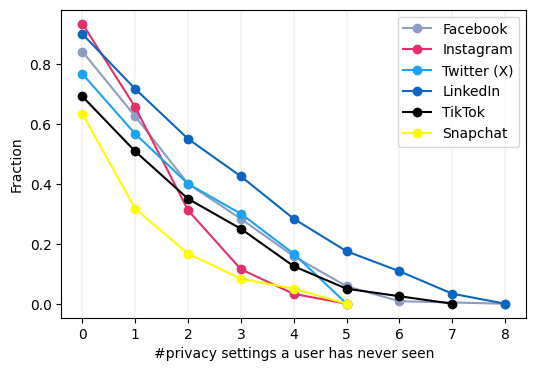

In [10]:
import matplotlib.pyplot as plt
import numpy as np

platform_colors = {"Facebook": "#8b9dc3", 
          "Instagram": "#e1306c", 
          "Twitter (X)": "#1da1f2", 
          "LinkedIn": "#0a66c2", 
          "TikTok": "#000000", 
          "Snapchat": "#fffc00"
}

fig, axs = plt.subplots(figsize=(6, 4))

total_at_least_one, total_multiple, total_all= 0, 0, 0
for p in df_platform:
    selected_cols = list(privacy_features_seen_questions[p].values())
    print('#features on {}: {}'.format(p, len(selected_cols)))
    n_no = df_platform[p][selected_cols].apply(lambda x: x.str.contains('No')).sum(axis=1).reset_index(drop=True)
    labels, counts = np.unique(n_no, return_counts=True)
    total = sum(counts)
    total_at_least_one += sum(counts[1:])
    total_multiple += sum(counts[2:])
    total_all += total
    # at least one, more than one, max, mean (sd), median
    print('#participants who have never seen at least one of the privacy settings: {} ({:.2f}%)'.format(sum(counts[1:]), sum(counts[1:])/total))
    print('#participants who have never seen multiple of the privacy settings: {} ({:.2f}%)'.format(sum(counts[2:]), sum(counts[2:])/total))
    print('max of #NOT_SEEN: {}'.format(np.max(n_no)))
    print('mean of #NOT_SEEN: {}'.format(np.mean(n_no)))
    print('sd of #NOT_SEEN: {}'.format(np.std(n_no)))
    print('median of #NOT_SEEN: {}'.format(np.median(n_no)))
    print()
    pdf = [c/total for c in counts]
    # print(pdf)
    ccdf = 1 - np.cumsum(pdf)
    # print(cdf)
    axs.plot(labels, ccdf, marker='o', color=platform_colors[p], label=p)
    
axs.set_xlabel("#privacy settings a user has never seen")
axs.set_ylabel("Fraction")

# Add vertical marker lines
axs.axvline(x=0, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=1, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=2, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=3, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=4, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=5, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=6, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=7, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=8, color='whitesmoke', linestyle='solid', zorder=0)

plt.legend()

print('TOTAL')
print('#participants who have never seen at least one of the privacy settings: {} ({:.2f}%)'.format(total_at_least_one, total_at_least_one/total_all))
print('#participants who have never seen multiple of the privacy settings: {} ({:.2f}%)'.format(total_multiple, total_multiple/total_all))

# plt.savefig('n_not_seen.pdf')

#features on Facebook: 8
#participants who prefer at least one of their default settings to be more private: 112 (0.93%)
#participants who prefer multiple of their default settings to be more private: 109 (0.91%)
max of #PRIVATE: 8
mean of #PRIVATE: 5.0
sd of #PRIVATE: 2.0976176963403033
median of #PRIVATE: 6.0

#features on Instagram: 5
#participants who prefer at least one of their default settings to be more private: 58 (0.95%)
#participants who prefer multiple of their default settings to be more private: 53 (0.87%)
max of #PRIVATE: 5
mean of #PRIVATE: 3.0327868852459017
sd of #PRIVATE: 1.4138334485206778
median of #PRIVATE: 3.0

#features on Twitter (X): 5
#participants who prefer at least one of their default settings to be more private: 55 (0.92%)
#participants who prefer multiple of their default settings to be more private: 48 (0.80%)
max of #PRIVATE: 4
mean of #PRIVATE: 2.3333333333333335
sd of #PRIVATE: 1.1055415967851332
median of #PRIVATE: 2.0

#features on LinkedIn: 8
#pa

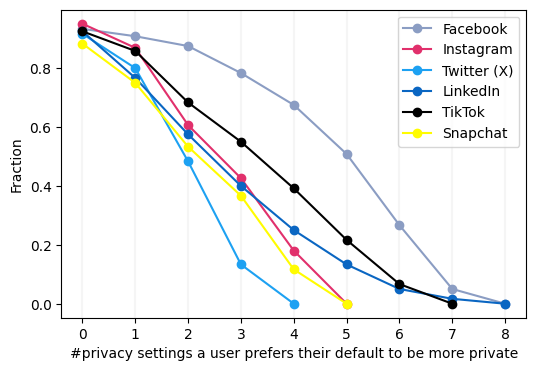

In [11]:
import matplotlib.pyplot as plt
import numpy as np

platform_colors = {"Facebook": "#8b9dc3", 
          "Instagram": "#e1306c", 
          "Twitter (X)": "#1da1f2", 
          "LinkedIn": "#0a66c2", 
          "TikTok": "#000000", 
          "Snapchat": "#fffc00"
}

fig, axs = plt.subplots(figsize=(6, 4))

total_at_least_one, total_multiple, total_all= 0, 0, 0
for p in df_platform:
    selected_cols = list(privacy_features_default_questions[p].values())
    print('#features on {}: {}'.format(p, len(selected_cols)))
    n_private = df_platform[p][selected_cols].apply(lambda x: x.str.contains('PRIVATE')).sum(axis=1).reset_index(drop=True)
    labels, counts = np.unique(n_private, return_counts=True)
    total = sum(counts)
    total_at_least_one += sum(counts[1:])
    total_multiple += sum(counts[2:])
    total_all += total
    # at least one, more than one, max, mean (sd), median
    print('#participants who prefer at least one of their default settings to be more private: {} ({:.2f}%)'.format(sum(counts[1:]), sum(counts[1:])/total))
    print('#participants who prefer multiple of their default settings to be more private: {} ({:.2f}%)'.format(sum(counts[2:]), sum(counts[2:])/total))
    print('max of #PRIVATE: {}'.format(np.max(n_private)))
    print('mean of #PRIVATE: {}'.format(np.mean(n_private)))
    print('sd of #PRIVATE: {}'.format(np.std(n_private)))
    print('median of #PRIVATE: {}'.format(np.median(n_private)))
    print()
    pdf = [c/total for c in counts]
    # print(pdf)
    ccdf = 1 - np.cumsum(pdf)
    # print(cdf)
    axs.plot(labels, ccdf, marker='o', color=platform_colors[p], label=p)
    
axs.set_xlabel("#privacy settings a user prefers their default to be more private")
axs.set_ylabel("Fraction")

# Add vertical marker lines
axs.axvline(x=0, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=1, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=2, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=3, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=4, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=5, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=6, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=7, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=8, color='whitesmoke', linestyle='solid', zorder=0)

plt.legend()

print('TOTAL')
print('#participants who prefer at least one of their default settings to be more private: {} ({:.2f}%)'.format(total_at_least_one, total_at_least_one/total_all))
print('#participants who prefer multiple of their default settings to be more private: {} ({:.2f}%)'.format(total_multiple, total_multiple/total_all))

# plt.savefig('n_private.pdf')

#participants who feel that at least one of privacy features is hard to find: 96 (0.80%)
#participants who feel that multiple privacy features are hard to find: 66 (0.55%)
max of #HARD_TO_FIND: 4
mean of #HARD_TO_FIND: 1.725
sd of #HARD_TO_FIND: 1.2380259824952518
median of #HARD_TO_FIND: 2.0

#participants who feel that at least one of privacy features is hard to find: 55 (0.90%)
#participants who feel that multiple privacy features are hard to find: 48 (0.79%)
max of #HARD_TO_FIND: 4
mean of #HARD_TO_FIND: 2.2131147540983607
sd of #HARD_TO_FIND: 1.103121563361359
median of #HARD_TO_FIND: 2.0

#participants who feel that at least one of privacy features is hard to find: 53 (0.88%)
#participants who feel that multiple privacy features are hard to find: 34 (0.57%)
max of #HARD_TO_FIND: 5
mean of #HARD_TO_FIND: 2.0833333333333335
sd of #HARD_TO_FIND: 1.4865134450189885
median of #HARD_TO_FIND: 2.0

#participants who feel that at least one of privacy features is hard to find: 107 (0.89%)


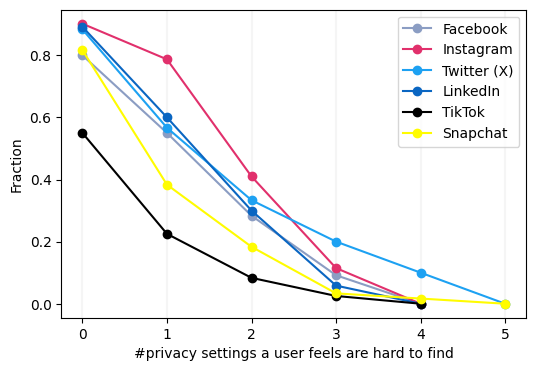

In [12]:
import matplotlib.pyplot as plt
import numpy as np

platform_colors = {"Facebook": "#8b9dc3", 
          "Instagram": "#e1306c", 
          "Twitter (X)": "#1da1f2", 
          "LinkedIn": "#0a66c2", 
          "TikTok": "#000000", 
          "Snapchat": "#fffc00"
}

fig, axs = plt.subplots(figsize=(6, 4))

total_at_least_one, total_multiple, total_all= 0, 0, 0
for p in df_platform:
    selected_cols = []
    for col in list(privacy_features_find_questions[p].values()):
        prefix, value = col.split('.')
        for x in [2, 3]:
            selected_cols.append('.'.join([prefix, str(int(value) + x)]))

    df_temp = df_platform[p][selected_cols]
    new_cols = []
    for j in range(0, len(selected_cols), 2):
        new_c = selected_cols[j]+'_x'
        new_cols.append(new_c)
        df_temp[selected_cols[j]+'_x'] = df_temp[selected_cols[j]] + ' ' + df_temp[selected_cols[j+1]]
 
    n_hard_to_find = df_temp[new_cols].apply(lambda x: x.str.contains('No|Difficult')).sum(axis=1).reset_index(drop=True)
    labels, counts = np.unique(n_hard_to_find, return_counts=True)
    total = sum(counts)
    total_at_least_one += sum(counts[1:])
    total_multiple += sum(counts[2:])
    total_all += total
    # at least one, more than one, max, mean (sd), median
    print('#participants who feel that at least one of privacy features is hard to find: {} ({:.2f}%)'.format(sum(counts[1:]), sum(counts[1:])/total))
    print('#participants who feel that multiple privacy features are hard to find: {} ({:.2f}%)'.format(sum(counts[2:]), sum(counts[2:])/total))
    print('max of #HARD_TO_FIND: {}'.format(np.max(n_hard_to_find)))
    print('mean of #HARD_TO_FIND: {}'.format(np.mean(n_hard_to_find)))
    print('sd of #HARD_TO_FIND: {}'.format(np.std(n_hard_to_find)))
    print('median of #HARD_TO_FIND: {}'.format(np.median(n_hard_to_find)))
    print()
    pdf = [c/total for c in counts]
    # print(pdf)
    ccdf = 1 - np.cumsum(pdf)
    # print(cdf)
    axs.plot(labels, ccdf, marker='o', color=platform_colors[p], label=p)
    
axs.set_xlabel("#privacy settings a user feels are hard to find")
axs.set_ylabel("Fraction")

# Add vertical marker lines
axs.axvline(x=0, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=1, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=2, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=3, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=4, color='whitesmoke', linestyle='solid', zorder=0)
axs.axvline(x=5, color='whitesmoke', linestyle='solid', zorder=0)

plt.legend()

print('TOTAL')
print('#participants who feel that at least one of privacy features is hard to find: {} ({:.2f}%)'.format(total_at_least_one, total_at_least_one/total_all))
print('#participants who feel that multiple privacy features are hard to find: {} ({:.2f}%)'.format(total_multiple, total_multiple/total_all))

# plt.savefig('n_hard_to_find.pdf')

## **Raw data for statistical analysis (P_SEEN, P_PRIVATE, P_HARD, A_TIME)**

In [13]:
table_columns = [
    "age", # 18-34, 35-54, 55+
    "gender", # male, female
    "education", # less than bachelor, bachelor, more than bachelor
    "tech_background", # no, yes
    "n_years", # <3, 3-5, 5+
    "use_freq", # daily, weekly, more than weekly
    "post_freq", # monthly, more than monthly
    "n_other_platforms", # number of other used platforms
    "os" #andriod, ios
]

X_column_mapping = {
    "age": "Q6.9", 
    "gender": "Q6.10", 
    "education": "Q6.11", 
    "tech_background": "Q6.12", 
    "n_years": "Q6.2", 
    "use_freq": "Q6.3", 
    "post_freq": "Q6.4", 
    "n_other_platforms": "Q6.7", 
    "os": "Q3.4", 
}

In [14]:
privacy_features_time_questions = {
    "Facebook": {
        "audience": "Q4.1", 
        "account_suggestion": "Q4.6", 
        "activity_status": "Q4.11", 
        "message": "Q4.16", 
        "profile": "Q5.1", 
        "connection_view": "Q5.6", 
        "ads": "Q5.11", 
        "search": "Q5.16"
    }, 
    "Instagram": {
        "audience": "Q4.1", 
        "activity_status": "Q4.6", 
        "ads": "Q4.11", 
        "message": "Q4.16", 
        "video": "Q4.21", 
    }, 
    "Twitter (X)": {
        "audience": "Q4.1", 
        "account_suggestion": "Q4.6", 
        "message": "Q4.11", 
        "ads": "Q4.16", 
        "video": "Q4.21", 
    }, 
    "LinkedIn": {
        "audience": "Q4.1", 
        "account_suggestion": "Q4.6", 
        "message": "Q4.11", 
        "activity_status": "Q4.16", 
        "profile": "Q5.1", 
        "connection_view": "Q5.6", 
        "ads": "Q5.11", 
        "search": "Q5.16", 
    }, 
    "TikTok": {
        "audience": "Q4.1", 
        "account_suggestion": "Q4.11", 
        "message": "Q4.6", 
        "activity_status": "Q5.16", 
        "connection_view": "Q5.1", 
        "ads": "Q5.6", 
        "video": "Q5.11", 
    }, 
    "Snapchat": {
        "audience": "Q4.1", 
        "message": "Q4.16", 
        "ads": "Q4.21", 
        "activity_status": "Q4.11", 
        "account_suggestion": "Q4.6", 
    }
}

In [15]:
platform_list = ["Facebook", "Instagram", "Twitter (X)", "LinkedIn", "TikTok", "Snapchat"]

df_platform_stat = {}
for p in df_platform:
    data = []
    for _, row in df_platform[p].iterrows():
        table_row = [p]
        # X
        for table_col, platform_col in X_column_mapping.items():
            if table_col == 'n_other_platforms':
                other_platforms = set(row[platform_col].split(','))
                n_other_platforms = len(other_platforms - {'No', ' I only use {}'.format(p), 'Others'})
                others_text = row[platform_col+'_7_TEXT']
                if others_text and not pd.isnull(others_text):
                    n_other_platforms += len(others_text.split(','))
                table_row += [n_other_platforms]
            elif 'usage' in table_col:
                c, v = platform_col[0], platform_col[1]
                table_row += [1] if v in row[c] else [0]
            else:
                table_row += [row[platform_col]]

        data.append(table_row)

    df = pd.DataFrame(data, columns=["platform"]+table_columns)
    # Y
    # p_seen
    seen_cols = list(privacy_features_seen_questions[p].values())
    # print('#seen_features on {}: {}'.format(p, len(seen_cols)))
    n_seen = df_platform[p][seen_cols].apply(lambda x: x.str.contains('Yes')).sum(axis=1).reset_index(drop=True)
    p_seen = n_seen / len(seen_cols)
    df["P_SEEN"] = p_seen
    # p_private 
    default_cols = list(privacy_features_default_questions[p].values())
    # print('#default_features on {}: {}'.format(p, len(default_cols)))
    n_private = df_platform[p][default_cols].apply(lambda x: x.str.contains('PRIVATE')).sum(axis=1).reset_index(drop=True)
    p_private = n_private / len(default_cols)
    df["P_PRIVATE"] = p_private
    # p_hard_to_find
    selected_cols = []
    for col in list(privacy_features_find_questions[p].values()):
        prefix, value = col.split('.')
        for x in [2, 3]:
            selected_cols.append('.'.join([prefix, str(int(value) + x)]))
    n_features = len(selected_cols) / 2.0
    # print('#features on {}: {}'.format(p, n_features))
    df_temp = df_platform[p][selected_cols]
    new_cols = []
    for j in range(0, len(selected_cols), 2):
        new_c = selected_cols[j]+'_x'
        new_cols.append(new_c)
        df_temp[selected_cols[j]+'_x'] = df_temp[selected_cols[j]] + ' ' + df_temp[selected_cols[j+1]] 
    n_hard_to_find = df_temp[new_cols].apply(lambda x: x.str.contains('No|Difficult')).sum(axis=1).reset_index(drop=True)
    p_hard_to_find = n_hard_to_find / n_features
    df["P_HARD"] = p_hard_to_find
    df["P_HARD"] = df["P_HARD"].astype(float)
    # avg_n_seconds_find
    time_cols = [col + "_Page Submit" for col in list(privacy_features_time_questions[p].values())]
    total_seconds = df_platform[p][time_cols].astype(float).fillna(0).sum(axis=1).reset_index(drop=True)
    n_questions = df_platform[p][time_cols].notna().sum(axis=1).reset_index(drop=True)
    average_seconds = total_seconds / n_questions
    df["A_TIME"] = average_seconds

    df_platform_stat[p] = df

df_stat = pd.concat([df_platform_stat[p] for p in platform_list]).reset_index(drop=True)
print("#rows: {}".format(df_stat.shape[0]))

#rows: 541


In [16]:
df_stat.head()

,platform,age,gender,education,tech_background,n_years,use_freq,post_freq,n_other_platforms,os,P_SEEN,P_PRIVATE,P_HARD,A_TIME
0,Facebook,18-24 years,Female,High school degree or equivalent,No,>5 years,Daily,Rarely,5,Android,0.62,0.75,0.12,265.89
1,Facebook,35-44 years,Male,Bachelor’s degree,Yes,>5 years,Rarely,Never,2,iOS,1.00,0.88,0.12,73.49
2,Facebook,55-64 years,Male,Bachelor’s degree,Yes,>5 years,Weekly,Rarely,3,Android,0.75,0.38,0.25,254.00
3,Facebook,45-54 years,Male,High school degree or equivalent,No,>5 years,Weekly,Rarely,0,Android,0.88,0.88,0.00,45.04
4,Facebook,18-24 years,Male,Bachelor’s degree,Yes,>5 years,Daily,Rarely,3,Android,1.00,0.25,0.38,39.95


## **Correlations (Section 4.4)**

In [17]:
from scipy import stats

print("TOTAL (N={}): P_HARD vs A_TIME".format(df_stat.shape[0]))
correlation, p_value = stats.pearsonr(df_stat["P_HARD"], df_stat["A_TIME"])
print("Pearson correlation: {}, P-value: {}\n".format(correlation, p_value))

print("TOTAL (N={}): P_SEEN vs P_HARD".format(df_stat.shape[0]))
correlation, p_value = stats.pearsonr(df_stat["P_SEEN"], df_stat["P_HARD"])
print("Pearson correlation: {}, P-value: {}\n".format(correlation, p_value))

print("TOTAL (N={}): P_PRIVATE vs P_HARD".format(df_stat.shape[0]))
correlation, p_value = stats.pearsonr(df_stat["P_PRIVATE"], df_stat["P_HARD"])
print("Pearson correlation: {}, P-value: {}\n".format(correlation, p_value))

for p in platform_list:
    df = df_stat[df_stat["platform"] == p]
    print("{} (N={}): P_SEEN vs P_HARD".format(p, df.shape[0]))
    correlation, p_value = stats.pearsonr(df["P_SEEN"], df["P_HARD"])
    print("Pearson correlation: {}, P-value: {}\n".format(correlation, p_value))
    

TOTAL (N=541): P_HARD vs A_TIME
Pearson correlation: 0.1623749574880311, P-value: 0.00014871162716476703

TOTAL (N=541): P_SEEN vs P_HARD
Pearson correlation: -0.3283759060056282, P-value: 4.5572481072961075e-15

TOTAL (N=541): P_PRIVATE vs P_HARD
Pearson correlation: 0.08918944262618465, P-value: 0.03809513214444273

Facebook (N=120): P_SEEN vs P_HARD
Pearson correlation: -0.23514542298688001, P-value: 0.009729875481811581

Instagram (N=61): P_SEEN vs P_HARD
Pearson correlation: -0.31063327935171414, P-value: 0.014828538912088927

Twitter (X) (N=60): P_SEEN vs P_HARD
Pearson correlation: -0.3807436699635699, P-value: 0.0026899871174350786

LinkedIn (N=120): P_SEEN vs P_HARD
Pearson correlation: -0.28397557506530136, P-value: 0.0016710651037972798

TikTok (N=120): P_SEEN vs P_HARD
Pearson correlation: -0.13587218260007144, P-value: 0.1389540460583118

Snapchat (N=60): P_SEEN vs P_HARD
Pearson correlation: -0.5123504261640529, P-value: 2.8536797719111005e-05



## **Demographic and usage differences (Section 4.5)**

In [18]:
df_stat["age_x"] = df_stat["age"].apply(lambda x: "18-44" if x in ["18-24 years", "25-34 years", "35-44 years"] else ">=45")
df_stat["gender_x"] = df_stat["gender"].apply(lambda x: x if x in ["Male", "Female"] else None)
df_stat["education_x"] = df_stat["education"].apply(lambda x: ">=Bachelor" if x in ["Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional degree"] else "<Bachelor")
df_stat["tech_background_x"] = df_stat["tech_background"]
df_stat["n_years_x"] = df_stat["n_years"].apply(lambda x: ">=3" if x in ["3-5 years", ">5 years"] else "<3")
df_stat["use_freq_x"] = df_stat["use_freq"].apply(lambda x: x if x in ["Daily", "Weekly"] else "<Weekly")
df_stat["post_freq_x"] = df_stat["post_freq"].apply(lambda x: "<Monthly" if x in ["Rarely", "Never"] else ">=Monthly")
df_stat["os_x"] = df_stat["os"].apply(lambda x: x if x in ["iOS", "Android"] else None)
df_stat["n_other_platforms_x"] = df_stat["n_other_platforms"]

In [19]:
df_stat.head()
# df_stat.to_csv('stat_raw.csv', index=False) # uncomment this if you want to download the proprocessed raw data (csv) to run statistical analysis on stat software such as SPSS. 

,platform,age,gender,education,tech_background,n_years,use_freq,post_freq,n_other_platforms,os,P_SEEN,P_PRIVATE,P_HARD,A_TIME,age_x,gender_x,education_x,tech_background_x,n_years_x,use_freq_x,post_freq_x,os_x,n_other_platforms_x
0,Facebook,18-24 years,Female,High school degree or equivalent,No,>5 years,Daily,Rarely,5,Android,0.62,0.75,0.12,265.89,18-44,Female,<Bachelor,No,>=3,Daily,<Monthly,Android,5
1,Facebook,35-44 years,Male,Bachelor’s degree,Yes,>5 years,Rarely,Never,2,iOS,1.00,0.88,0.12,73.49,18-44,Male,>=Bachelor,Yes,>=3,<Weekly,<Monthly,iOS,2
2,Facebook,55-64 years,Male,Bachelor’s degree,Yes,>5 years,Weekly,Rarely,3,Android,0.75,0.38,0.25,254.00,>=45,Male,>=Bachelor,Yes,>=3,Weekly,<Monthly,Android,3
3,Facebook,45-54 years,Male,High school degree or equivalent,No,>5 years,Weekly,Rarely,0,Android,0.88,0.88,0.00,45.04,>=45,Male,<Bachelor,No,>=3,Weekly,<Monthly,Android,0
4,Facebook,18-24 years,Male,Bachelor’s degree,Yes,>5 years,Daily,Rarely,3,Android,1.00,0.25,0.38,39.95,18-44,Male,>=Bachelor,Yes,>=3,Daily,<Monthly,Android,3


In [20]:
reference = {
    "age_x": '18-44', 
    "gender_x": 'Female', 
    "education_x": '>=Bachelor', 
    "tech_background_x": 'No', 
    "n_years_x": '>=3', 
    "use_freq_x": 'Daily', 
    "post_freq_x": '<Monthly', 
    "os_x": 'iOS'
}

In [21]:
import statsmodels.api as sm

print("Demographic and usage IVs vs P_SEEN ...\n\n")

for x in [c+'_x' for c in table_columns]:
    if x == 'n_other_platforms_x':
        X = sm.add_constant(df_stat[x])
        Y = df_stat["P_SEEN"]
        print("=> TOTAL (N={}), IV={}".format(df_X_Y.shape[0], x[:-2]))
    else:
        df_X_Y = df_stat[[x, "P_SEEN"]].dropna()
        x_dummies = pd.get_dummies(df_X_Y[x], dtype=int).drop(reference[x], axis=1)
        X = sm.add_constant(x_dummies)
        Y = df_X_Y["P_SEEN"]
        print("=> TOTAL (N={}), IV={}, REF={}".format(df_X_Y.shape[0], x[:-2], reference[x]))

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Demographic and usage IVs vs P_SEEN ...


=> TOTAL (N=541), IV=age, REF=18-44
                            OLS Regression Results                            
Dep. Variable:                 P_SEEN   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     17.91
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           2.73e-05
Time:                        19:11:51   Log-Likelihood:                -71.330
No. Observations:                 541   AIC:                             146.7
Df Residuals:                     539   BIC:                             155.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [22]:
import statsmodels.api as sm

print("Demographic and usage IVs vs P_PRIVATE ...\n\n")

for x in [c+'_x' for c in table_columns]:
    if x == 'n_other_platforms_x':
        X = sm.add_constant(df_stat[x])
        Y = df_stat["P_PRIVATE"]
        print("=> TOTAL (N={}), IV={}".format(df_X_Y.shape[0], x[:-2]))
    else:
        df_X_Y = df_stat[[x, "P_PRIVATE"]].dropna()
        x_dummies = pd.get_dummies(df_X_Y[x], dtype=int).drop(reference[x], axis=1)
        X = sm.add_constant(x_dummies)
        Y = df_X_Y["P_PRIVATE"]
        print("=> TOTAL (N={}), IV={}, REF={}".format(df_X_Y.shape[0], x[:-2], reference[x]))

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Demographic and usage IVs vs P_PRIVATE ...


=> TOTAL (N=541), IV=age, REF=18-44
                            OLS Regression Results                            
Dep. Variable:              P_PRIVATE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.761
Date:                Mon, 09 Jun 2025   Prob (F-statistic):              0.185
Time:                        19:11:51   Log-Likelihood:                -78.791
No. Observations:                 541   AIC:                             161.6
Df Residuals:                     539   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [23]:
import statsmodels.api as sm

print("Demographic and usage IVs vs P_HARD ...\n\n")

for x in [c+'_x' for c in table_columns]:
    if x == 'n_other_platforms_x':
        X = sm.add_constant(df_stat[x])
        Y = df_stat["P_HARD"]
        print("=> TOTAL (N={}), IV={}".format(df_X_Y.shape[0], x[:-2]))
    else:
        df_X_Y = df_stat[[x, "P_HARD"]].dropna()
        x_dummies = pd.get_dummies(df_X_Y[x], dtype=int).drop(reference[x], axis=1)
        X = sm.add_constant(x_dummies)
        Y = df_X_Y["P_HARD"]
        print("=> TOTAL (N={}), IV={}, REF={}".format(df_X_Y.shape[0], x[:-2], reference[x]))

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Demographic and usage IVs vs P_HARD ...


=> TOTAL (N=541), IV=age, REF=18-44
                            OLS Regression Results                            
Dep. Variable:                 P_HARD   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.068
Date:                Mon, 09 Jun 2025   Prob (F-statistic):            0.00468
Time:                        19:11:52   Log-Likelihood:                 69.970
No. Observations:                 541   AIC:                            -135.9
Df Residuals:                     539   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [24]:
import statsmodels.api as sm

print("Demographic and usage IVs vs A_TIME ...\n\n")

for x in [c+'_x' for c in table_columns]:
    if x == 'n_other_platforms_x':
        X = sm.add_constant(df_stat[x])
        Y = df_stat["A_TIME"]
        print("=> TOTAL (N={}), IV={}".format(df_X_Y.shape[0], x[:-2]))
    else:
        df_X_Y = df_stat[[x, "A_TIME"]].dropna()
        x_dummies = pd.get_dummies(df_X_Y[x], dtype=int).drop(reference[x], axis=1)
        X = sm.add_constant(x_dummies)
        Y = df_X_Y["A_TIME"]
        print("=> TOTAL (N={}), IV={}, REF={}".format(df_X_Y.shape[0], x[:-2], reference[x]))

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Demographic and usage IVs vs A_TIME ...


=> TOTAL (N=541), IV=age, REF=18-44
                            OLS Regression Results                            
Dep. Variable:                 A_TIME   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.014
Date:                Mon, 09 Jun 2025   Prob (F-statistic):             0.0456
Time:                        19:11:52   Log-Likelihood:                -2990.1
No. Observations:                 541   AIC:                             5984.
Df Residuals:                     539   BIC:                             5993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

## **Platform-specific differences (Section 4.6)**

In [25]:
import statsmodels.api as sm

print("Platform IVs vs P_SEEN ...\n\n")

for p in platform_list:
    print("=> REF platform: {}".format(p))
    x_dummies = pd.get_dummies(df_stat["platform"], dtype=int).drop(p, axis=1)
    X = sm.add_constant(x_dummies)
    Y = df_stat["P_SEEN"]

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Platform IVs vs P_SEEN ...


=> REF platform: Facebook
                            OLS Regression Results                            
Dep. Variable:                 P_SEEN   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.293
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.09e-05
Time:                        19:11:52   Log-Likelihood:                -64.711
No. Observations:                 541   AIC:                             141.4
Df Residuals:                     535   BIC:                             167.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [26]:
import statsmodels.api as sm

print("Platform IVs vs P_PRIVATE ...\n\n")

for p in platform_list:
    print("=> REF platform: {}".format(p))
    x_dummies = pd.get_dummies(df_stat["platform"], dtype=int).drop(p, axis=1)
    X = sm.add_constant(x_dummies)
    Y = df_stat["P_PRIVATE"]

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Platform IVs vs P_PRIVATE ...


=> REF platform: Facebook
                            OLS Regression Results                            
Dep. Variable:              P_PRIVATE   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     11.12
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           3.29e-10
Time:                        19:11:52   Log-Likelihood:                -52.926
No. Observations:                 541   AIC:                             117.9
Df Residuals:                     535   BIC:                             143.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [27]:
import statsmodels.api as sm

print("Platform IVs vs P_HARD ...\n\n")

for p in platform_list:
    print("=> REF platform: {}".format(p))
    x_dummies = pd.get_dummies(df_stat["platform"], dtype=int).drop(p, axis=1)
    X = sm.add_constant(x_dummies)
    Y = df_stat["P_HARD"]

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Platform IVs vs P_HARD ...


=> REF platform: Facebook
                            OLS Regression Results                            
Dep. Variable:                 P_HARD   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     34.26
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           2.15e-30
Time:                        19:11:52   Log-Likelihood:                 141.09
No. Observations:                 541   AIC:                            -270.2
Df Residuals:                     535   BIC:                            -244.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [28]:
import statsmodels.api as sm

print("Platform IVs vs A_TIME ...\n\n")

for p in platform_list:
    print("=> REF platform: {}".format(p))
    x_dummies = pd.get_dummies(df_stat["platform"], dtype=int).drop(p, axis=1)
    X = sm.add_constant(x_dummies)
    Y = df_stat["A_TIME"]

    # single linear regression
    model = sm.OLS(Y, X)
    result = model.fit()
    print(result.summary())
    print("\n\n")

Platform IVs vs A_TIME ...


=> REF platform: Facebook
                            OLS Regression Results                            
Dep. Variable:                 A_TIME   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.337
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.15e-06
Time:                        19:11:52   Log-Likelihood:                -2974.2
No. Observations:                 541   AIC:                             5960.
Df Residuals:                     535   BIC:                             5986.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## **Usage tables and figures (Appendix C)**

In [29]:
general_usage_cols_encode = {
    "Q6.2": "n_years",
    "Q6.3": "use_freq",
    "Q6.4": "post_freq",
    "Q6.7": "n_other_platforms"
}

general_usage_choices = [general_usage_cols_encode["Q6.2"]] + [c for c in choices["Q6.2"]] + \
                        [general_usage_cols_encode["Q6.3"]] + [c for c in choices["Q6.3"]] + \
                        [general_usage_cols_encode["Q6.4"]] + [c for c in choices["Q6.4"]] + \
                        [general_usage_cols_encode["Q6.7"]] + [c for c in choices["Q6.7"]]

multi_index_tuples = [("Facebook" , "N"), 
                      ("Facebook" , "%"), 
                      ("Instagram" , "N"), 
                      ("Instagram" , "%"), 
                      ("Twitter (X)" , "N"), 
                      ("Twitter (X)" , "%"), 
                      ("LinkedIn" , "N"), 
                      ("LinkedIn" , "%"), 
                      ("TikTok" , "N"), 
                      ("TikTok" , "%"), 
                      ("Snapchat" , "N"), 
                      ("Snapchat" , "%"), 
                      ("Total", "N"), 
                      ("Total", "%")]

multi_general_col_names = pd.MultiIndex.from_tuples([("General Usage" , "")] + multi_index_tuples) 
df_general_usage = pd.DataFrame(columns=multi_general_col_names)
df_general_usage["General Usage", ""] = general_usage_choices

n_responses = 0
for p in df_platform:
    df = df_platform[p]
    n_responses += df.shape[0]
    general_n_cols, general_percent_cols = [], []
    for key in ["Q6.2", "Q6.3", "Q6.4", "Q6.7"]:
        c = df[key]
        if key in ["Q6.7"]:
            # multiple choices
            sub_n_cols, sub_percent_cols = get_sub_cols(c, key, "multiple")
        else:
            sub_n_cols, sub_percent_cols = get_sub_cols(c, key)

        general_n_cols += sub_n_cols
        general_percent_cols += sub_percent_cols

    df_general_usage["{}".format(p), "N"] = general_n_cols
    df_general_usage["{}".format(p), "%"] = general_percent_cols

df_general_usage["Total" , "N"] = df_general_usage["Facebook" , "N"] + df_general_usage["Instagram" , "N"] + \
                                    df_general_usage["Twitter (X)" , "N"] + df_general_usage["LinkedIn" , "N"] + \
                                    df_general_usage["TikTok" , "N"] + df_general_usage["Snapchat" , "N"]
df_general_usage["Total", "%"] = 100 * df_general_usage["Total", "N"] / n_responses

In [30]:
df_general_usage

General Usage Facebook        Instagram        Twitter (X)         \
                             N      %         N      %           N      %   
0             n_years      120 100.00        61 100.00          60 100.00   
1             <1 year        2   1.67         2   3.28           4   6.67   
2           1-3 years        5   4.17        17  27.87          17  28.33   
3           3-5 years        4   3.33        10  16.39           9  15.00   
4            >5 years      109  90.83        32  52.46          30  50.00   
5            use_freq      120 100.00        61 100.00          60 100.00   
6               Daily       65  54.17        31  50.82          24  40.00   
7              Weekly       36  30.00        22  36.07          17  28.33   
8             Monthly        8   6.67         3   4.92           7  11.67   
9              Rarely       11   9.17         5   8.20          12  20.00   
10          post_freq      120 100.00        61 100.00          60 100.00   
11              Daily        8   6.67         5   8.20           5   8.33   
12             Weekly       24  20.00        12  19.67           5   8.33   
13            Monthly       17  14.17         9  14.75           8  13.33   
14             Rarely       52  43.33        28  45.90          30  50.00   
15              Never       19  15.83         7  11.48          12  20.00   
16  n_other_platforms      120 100.00        61 100.00          60 100.00   
17           Facebook        9   7.50        48  78.69          52  86.67   
18          Instagram       93  77.50         1   1.64          48  80.00   
19        Twitter (X)       67  55.83        34  55.74           1   1.67   
20           LinkedIn       58  48.33        30  49.18          28  46.67   
21             TikTok       51  42.50        32  52.46          35  58.33   
22           Snapchat       16  13.33        11  18.03           7  11.67   
23             Others       12  10.00         8  13.11           5   8.33   

   LinkedIn        TikTok        Snapchat        Total         
          N      %      N      %        N      %     N      %  
0       120 100.00    120 100.00       60 100.00   541 100.00  
1        10   8.33     25  20.83       15  25.00    58  10.72  
2        23  19.17     53  44.17       16  26.67   131  24.21  
3        24  20.00     34  28.33        5   8.33    86  15.90  
4        63  52.50      8   6.67       24  40.00   266  49.17  
5       120 100.00    120 100.00       60 100.00   541 100.00  
6        16  13.33     60  50.00       14  23.33   210  38.82  
7        40  33.33     33  27.50       22  36.67   170  31.42  
8        23  19.17      9   7.50       11  18.33    61  11.28  
9        41  34.17     18  15.00       13  21.67   100  18.48  
10      120 100.00    120 100.00       60 100.00   541 100.00  
11        1   0.83      6   5.00        3   5.00    28   5.18  
12        9   7.50     17  14.17        9  15.00    76  14.05  
13       13  10.83     11   9.17        8  13.33    66  12.20  
14       64  53.33     42  35.00       33  55.00   249  46.03  
15       33  27.50     44  36.67        7  11.67   122  22.55  
16      120 100.00    120 100.00       60 100.00   541 100.00  
17       94  78.33    103  85.83       52  86.67   358  66.17  
18       97  80.83     98  81.67       54  90.00   391  72.27  
19       66  55.00     69  57.50       35  58.33   272  50.28  
20        2   1.67     69  57.50       30  50.00   217  40.11  
21       59  49.17      1   0.83       40  66.67   218  40.30  
22       25  20.83     25  20.83        0   0.00    84  15.53  
23       17  14.17     10   8.33        3   5.00    55  10.17

**Figure 5**

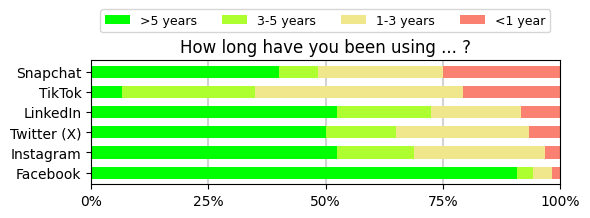

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

platform_list = ["Facebook", "Instagram", "Twitter (X)", "LinkedIn", "TikTok", "Snapchat"]
likelihood = [">5 years", "3-5 years", "1-3 years", "<1 year"]
colors = ["lime", "greenyellow", "khaki", "salmon"]
title = "How long have you been using ... ?"
data = defaultdict(list)

for index, row in df_general_usage.iloc[0:5].iterrows():
    if index == 0:
        continue
    l = row["General Usage", ""]
    for p in platform_list:
        data[l].append(row[p, '%'])

fig, axs = plt.subplots(figsize=(6, 2))
axs.set_title(title)
left_memo = np.array([0.0 for _ in platform_list])
for i, l in enumerate(likelihood):
    values = np.array(data[l])
    axs.barh(platform_list, values, left=left_memo, color=colors[i], label=l, height=0.6)
    left_memo += values

plt.setp(axs, xticks=[0, 25, 50, 75, 100], xticklabels=['0%', '25%', '50%', '75%', '100%'], xlim=(0,100))

# Add vertical marker lines
axs.axvline(x=25, color='lightgrey', linestyle='solid', zorder=0)
axs.axvline(x=50, color='lightgrey', linestyle='solid', zorder=0)
axs.axvline(x=75, color='lightgrey', linestyle='solid', zorder=0)

# Add a legend
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(likelihood), bbox_to_anchor=(0.55, 1.1), loc='upper center', fontsize=9)
fig.tight_layout()

# fig.savefig('n_years.pdf', bbox_inches='tight')

**Figure 6**

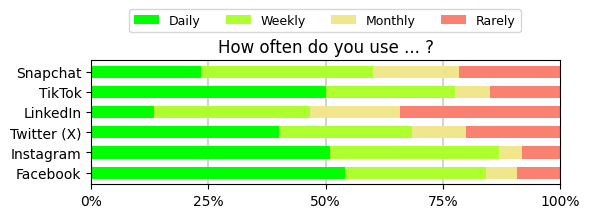

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

platform_list = ["Facebook", "Instagram", "Twitter (X)", "LinkedIn", "TikTok", "Snapchat"]
likelihood = ["Daily", "Weekly", "Monthly", "Rarely"]
colors = ["lime", "greenyellow", "khaki", "salmon"]
title = "How often do you use ... ?"
data = defaultdict(list)

for index, row in df_general_usage.iloc[5:10].iterrows():
    if index == 5:
        continue
    l = row["General Usage", ""]
    for p in platform_list:
        data[l].append(row[p, '%'])

fig, axs = plt.subplots(figsize=(6, 2))
axs.set_title(title)
left_memo = np.array([0.0 for _ in platform_list])
for i, l in enumerate(likelihood):
    values = np.array(data[l])
    axs.barh(platform_list, values, left=left_memo, color=colors[i], label=l, height=0.6)
    left_memo += values

plt.setp(axs, xticks=[0, 25, 50, 75, 100], xticklabels=['0%', '25%', '50%', '75%', '100%'], xlim=(0,100))

# Add vertical marker lines
axs.axvline(x=25, color='lightgrey', linestyle='solid', zorder=0)
axs.axvline(x=50, color='lightgrey', linestyle='solid', zorder=0)
axs.axvline(x=75, color='lightgrey', linestyle='solid', zorder=0)

# Add a legend
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(likelihood), bbox_to_anchor=(0.55, 1.1), loc='upper center', fontsize=9)
fig.tight_layout()

# fig.savefig('use_freq.pdf', bbox_inches='tight')

**Figure 7**

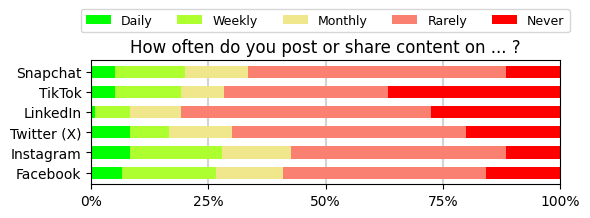

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

platform_list = ["Facebook", "Instagram", "Twitter (X)", "LinkedIn", "TikTok", "Snapchat"]
likelihood = ["Daily", "Weekly", "Monthly", "Rarely", "Never"]
colors = ["lime", "greenyellow", "khaki", "salmon", "red"]
title = "How often do you post or share content on ... ?"
data = defaultdict(list)

for index, row in df_general_usage.iloc[10:16].iterrows():
    if index == 10:
        continue
    l = row["General Usage", ""]
    for p in platform_list:
        data[l].append(row[p, '%'])

fig, axs = plt.subplots(figsize=(6, 2))
axs.set_title(title)
left_memo = np.array([0.0 for _ in platform_list])
for i, l in enumerate(likelihood):
    values = np.array(data[l])
    axs.barh(platform_list, values, left=left_memo, color=colors[i], label=l, height=0.6)
    left_memo += values

plt.setp(axs, xticks=[0, 25, 50, 75, 100], xticklabels=['0%', '25%', '50%', '75%', '100%'], xlim=(0,100))

# Add vertical marker lines
axs.axvline(x=25, color='lightgrey', linestyle='solid', zorder=0)
axs.axvline(x=50, color='lightgrey', linestyle='solid', zorder=0)
axs.axvline(x=75, color='lightgrey', linestyle='solid', zorder=0)

# Add a legend
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(likelihood), bbox_to_anchor=(0.55, 1.1), loc='upper center', fontsize=9)
fig.tight_layout()

# fig.savefig('share_freq.pdf', bbox_inches='tight')

**Figure 8**

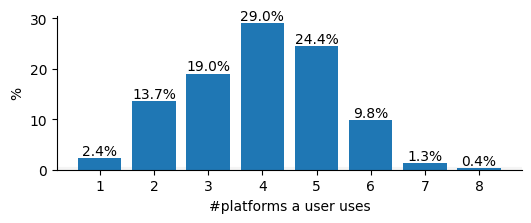

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(6, 2))
labels, counts = np.unique(1+df_stat["n_other_platforms"], return_counts=True)
percents = 100 * (counts / sum(counts))
bars = axs.bar(labels, percents)
for b in bars:
    height = b.get_height()
    axs.text(b.get_x() + b.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')
axs.set_xlabel('#platforms a user uses')
axs.set_ylabel('%')

# # Add vertical marker lines
axs.axhline(y=0.1, color='whitesmoke', linestyle='solid', zorder=0)
axs.axhline(y=0.15, color='whitesmoke', linestyle='solid', zorder=0)
axs.axhline(y=0.2, color='whitesmoke', linestyle='solid', zorder=0)
axs.axhline(y=0.25, color='whitesmoke', linestyle='solid', zorder=0)

# Remove top and right spines
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

# plt.savefig('n_platforms.pdf', bbox_inches='tight')

In [35]:
os_cols_encode = {
    "Q3.4": "os",
}

os_choices = [os_cols_encode["Q3.4"]] + [c for c in choices["Q3.4"]]

multi_index_tuples = [("Facebook" , "N"), 
                      ("Facebook" , "%"), 
                      ("Instagram" , "N"), 
                      ("Instagram" , "%"), 
                      ("Twitter (X)" , "N"), 
                      ("Twitter (X)" , "%"), 
                      ("LinkedIn" , "N"), 
                      ("LinkedIn" , "%"), 
                      ("TikTok" , "N"), 
                      ("TikTok" , "%"), 
                      ("Snapchat" , "N"), 
                      ("Snapchat" , "%"), 
                      ("Total", "N"), 
                      ("Total", "%")]

multi_os_col_names = pd.MultiIndex.from_tuples([("OS" , "")] + multi_index_tuples) 
df_os = pd.DataFrame(columns=multi_os_col_names)
df_os["OS", ""] = os_choices

n_responses = 0
for p in df_platform:
    df = df_platform[p]
    n_responses += df.shape[0]
    os_n_cols, os_percent_cols = [], []
    for key in ["Q3.4"]:
        c = df[key]
        sub_n_cols, sub_percent_cols = get_sub_cols(c, key)

        os_n_cols += sub_n_cols
        os_percent_cols += sub_percent_cols

    df_os["{}".format(p), "N"] = os_n_cols
    df_os["{}".format(p), "%"] = os_percent_cols

df_os["Total" , "N"] = df_os["Facebook" , "N"] + df_os["Instagram" , "N"] + \
                                    df_os["Twitter (X)" , "N"] + df_os["LinkedIn" , "N"] + \
                                    df_os["TikTok" , "N"] + df_os["Snapchat" , "N"]
df_os["Total", "%"] = 100 * df_os["Total", "N"] / n_responses

**Table 5**

In [36]:
df_os

OS Facebook        Instagram        Twitter (X)        LinkedIn  \
                  N      %         N      %           N      %        N   
0       os      120 100.00        61 100.00          60 100.00      120   
1  Android       80  66.67        34  55.74          40  66.67       76   
2      iOS       39  32.50        27  44.26          19  31.67       43   
3   Others        1   0.83         0   0.00           1   1.67        1   

         TikTok        Snapchat        Total         
       %      N      %        N      %     N      %  
0 100.00    120 100.00       60 100.00   541 100.00  
1  63.33     74  61.67       33  55.00   337  62.29  
2  35.83     46  38.33       27  45.00   201  37.15  
3   0.83      0   0.00        0   0.00     3   0.55